## Contexto y Objetivos

Transacciones que corresponden a la plataforma de OpenPay. El objetivo de este estudio es realizar un EDA sobre los datos entregados, análisis de correlaciones e insights utilizando algunas técnicas de Ciencia de Datos y Estadísticas.

### Supuestos:  

* Suponemos que la muestra entrega es representativa respecto a la población de transacciones a través del pago de tarjeta de crédito/débito, es decir que no hay sesgo estadístico.
* Suponemos que las transacciones corresponden al sistema de pago en un sitio web o aplicacion movil y enfocado en tarjetas de crédito y débito.
* Asumimos que el proceso de recolección de la data fue:

    * El cliente compra en tu sitio o App
    
    * El sitio/app envía la instrucción de pago
    
    * Se valida la transacción con el sistema anti-fraudes
    
    * Se envía al banco emisor de la tarjeta la instrucción de cargo
    
    * Se abona el pago de la compra a la cuenta del establecimiento/sitio




In [121]:
## Importamos liberías para el procesamiento de datos - EDA
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import math
import re

## Árbol de Decision
from sklearn import tree 
import pydotplus 
from IPython.display import Image

sns.set_style("white", {"xtick.major.size": 1, "ytick.major.size": 5})

## 1. PROCESAMIENTO DE LOS DATOS

## 1.1 Análisis de Valores NaN/Nulos

In [41]:
## Lectura de los datos
df = pd.read_csv("C:/Users/DELLL/Documents/Finance/logstash/Examen_Ciencia_Datos.csv")
df_cp = df.copy()
df_cp.head()

ID_transaccin    Monto   Orden  Recurrente Origen Fecha_de_operacin  \
0  trajsayjn3oy6ash81zk   $50.00  303518       False    API      1/15/20 0:39   
1  tr77kjqxlnu6z6lemi8d   $75.00  303521       False    API      1/15/20 0:59   
2  trkikbmurctefnh7xrgf  $400.00  303516       False    API      1/15/20 0:31   
3  tr8xqvmp5oevbkb4qi7z  $100.00  303538       False    API      1/15/20 2:35   
4  trkltpyra8kqmoeboogo  $100.00  303537       False    API      1/15/20 2:19   

   Score            Estado Reembolsos Contracargos  ...  Fecha_devolucin  \
0     38          Aceptada        NaN          NaN  ...              NaN   
1     39  Riesgo de fraude        NaN          NaN  ...              NaN   
2     28  Riesgo de fraude        NaN          NaN  ...              NaN   
3     41          Aceptada        NaN          NaN  ...              NaN   
4     31          Aceptada        NaN          NaN  ...              NaN   

   Fecha_contracargo Respuesta_de_banco Email_score das_prim_correo  \
0                NaN           Aceptada        50.0          3550.0   
1                NaN                NaN       138.0           905.0   
2                NaN                NaN        87.0          2405.0   
3                NaN           Aceptada       500.0            34.0   
4                NaN           Aceptada       500.0            34.0   

        Dominio Regla_nivel_normal Regla_nivel_medio  Regla_nivel_alto  Accin  
0     gmail.com           Aceptada          Aceptada          Aceptada    NaN  
1     gmail.com           Aceptada          Aceptada  Riesgo de fraude    NaN  
2  yahoo.com.mx           Aceptada          Aceptada  Riesgo de fraude    NaN  
3   hotmail.com                NaN               NaN               NaN    NaN  
4   hotmail.com                NaN               NaN               NaN    NaN  

[5 rows x 26 columns]

In [42]:
df_cp = df.copy()
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2969 entries, 0 to 2968
Data columns (total 26 columns):
ID_transaccin         2969 non-null object
Monto                 2969 non-null object
Orden                 2969 non-null int64
Recurrente            2969 non-null bool
Origen                2969 non-null object
Fecha_de_operacin     2969 non-null object
Score                 2969 non-null int64
Estado                2969 non-null object
Reembolsos            6 non-null object
Contracargos          3 non-null object
ID_cliente            2969 non-null int64
Canal_de_pago         0 non-null float64
Token                 2969 non-null object
Tipo_de_tarjeta       2969 non-null object
Dispositivo           1171 non-null object
ID comercio           2969 non-null object
Fecha_devolucin       6 non-null object
Fecha_contracargo     3 non-null object
Respuesta_de_banco    1277 non-null object
Email_score           2899 non-null float64
das_prim_correo       2899 non-null float64
Dominio

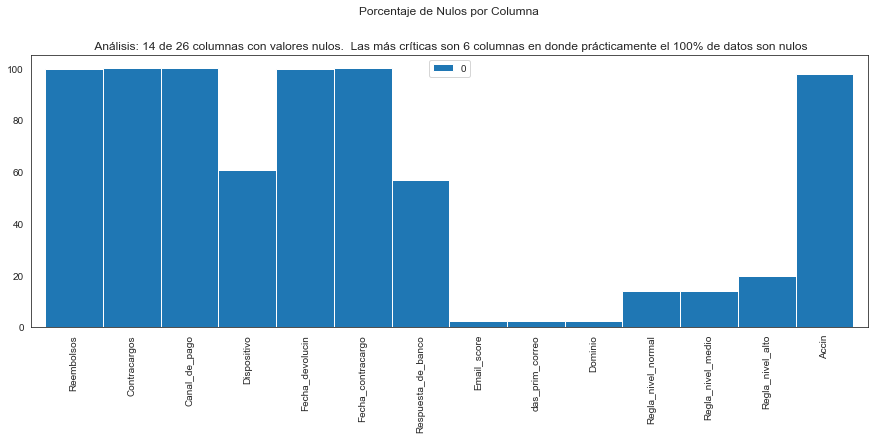

In [43]:
## Función nos da error de memoria
## HeatMap de Nulos
## sns.heatmap(df_cp.isnull())

## Analizamos el % de nulos por columna 

total_null = df_cp.isnull().sum()/df_cp.isnull().count()*100.0
total_null = total_null.to_frame()
total_null = total_null.loc[total_null.iloc[ : , 0 ] >= 0.02, :]
total_null.plot.bar(width = 1, figsize=(15,5), title="Porcentaje de Nulos por Columna\n\n\n Análisis: 14 de 26 columnas con valores nulos.  Las más críticas son 6 columnas en donde prácticamente el 100% de datos son nulos")

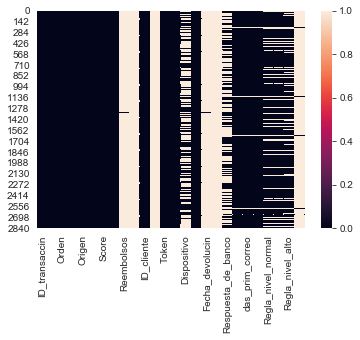

In [44]:
## Mapa de Calor para valores Nulos, espacios en blanco 
sns.heatmap(df_cp.isnull())

## 1.2 Limpieza de DataSet (Nulls/Nan)

In [45]:
## A continuación, eliminamos las columnas que no necesitamos para el análisis
df_cp.drop(['Token', 'Dispositivo', 'Reembolsos', 'Contracargos','Canal_de_pago','Fecha_devolucin','Fecha_contracargo','Origen'], axis=1, inplace=True)

In [46]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2969 entries, 0 to 2968
Data columns (total 18 columns):
ID_transaccin         2969 non-null object
Monto                 2969 non-null object
Orden                 2969 non-null int64
Recurrente            2969 non-null bool
Fecha_de_operacin     2969 non-null object
Score                 2969 non-null int64
Estado                2969 non-null object
ID_cliente            2969 non-null int64
Tipo_de_tarjeta       2969 non-null object
ID comercio           2969 non-null object
Respuesta_de_banco    1277 non-null object
Email_score           2899 non-null float64
das_prim_correo       2899 non-null float64
Dominio               2899 non-null object
Regla_nivel_normal    2551 non-null object
Regla_nivel_medio     2551 non-null object
Regla_nivel_alto      2388 non-null object
Accin                 70 non-null object
dtypes: bool(1), float64(2), int64(3), object(12)
memory usage: 397.3+ KB


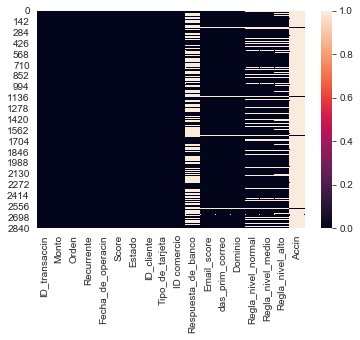

In [47]:
sns.heatmap(df_cp.isnull())

In [48]:
## Conversiónd el Monto a Float
df_cp.Monto.unique()
df_cp["Monto"] = df_cp["Monto"].str.replace(",","")
df_cp["Monto"] = df_cp["Monto"].str.replace("$","").astype(str).astype(float)

## 2. ANÁLISIS UNIVARIADO

### 2.1 Distribución de Montos de transacciones

Mean: 621.4492455372178
Median: 200.0
Std Dev: 1381.101048423064
Skew: 4.443509960838882
Kurtosis: 21.483440956270755
Percentil 25: 85.0
Percentil 50: 200.0
Percentil 75: 500.0
IQR: 415.0


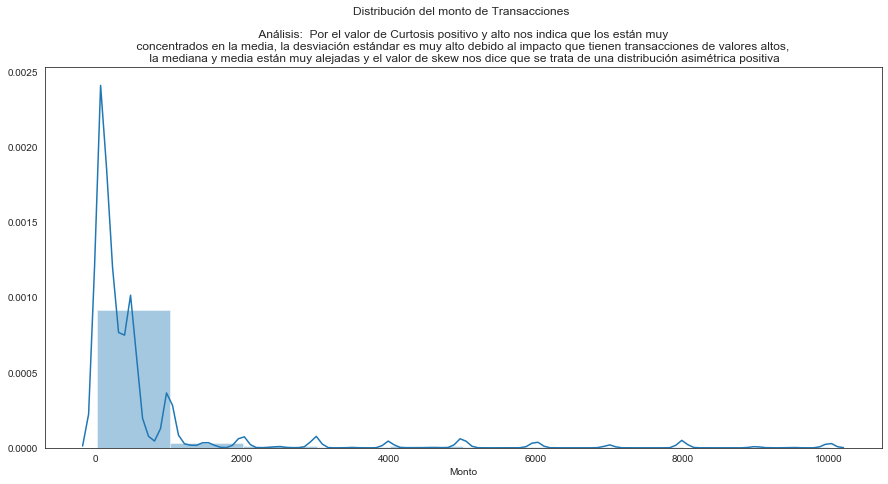

In [55]:

mean = df_cp['Monto'].mean()
median =  df_cp['Monto'].median()
std =  df_cp['Monto'].std()
skew =  df_cp['Monto'].skew()
kurt =  df_cp['Monto'].kurtosis()
print("Mean:", mean)
print("Median:", median)
print("Std Dev:", std)
print("Skew:", skew)
print("Kurtosis:", kurt)

per25 = np.percentile(df_cp['Monto'], 25)
print("Percentil 25:", per25)
per50 = np.percentile(df_cp['Monto'], 50)
print("Percentil 50:", per50)
per75 = np.percentile(df_cp['Monto'], 75)
print("Percentil 75:", per75)
iqr = per75-per25
print("IQR:", iqr)

fig, ax = plt.subplots()
plt.title("Distribución del monto de Transacciones \n\n Análisis:  Por el valor de Curtosis positivo y alto nos indica que los están muy \n concentrados en la media, la desviación estándar es muy alto debido al impacto que tienen transacciones de valores altos, \n la mediana y media están muy alejadas y el valor de skew nos dice que se trata de una distribución asimétrica positiva")
fig.set_size_inches(15, 7)
sns.distplot( df_cp['Monto'], bins=10)

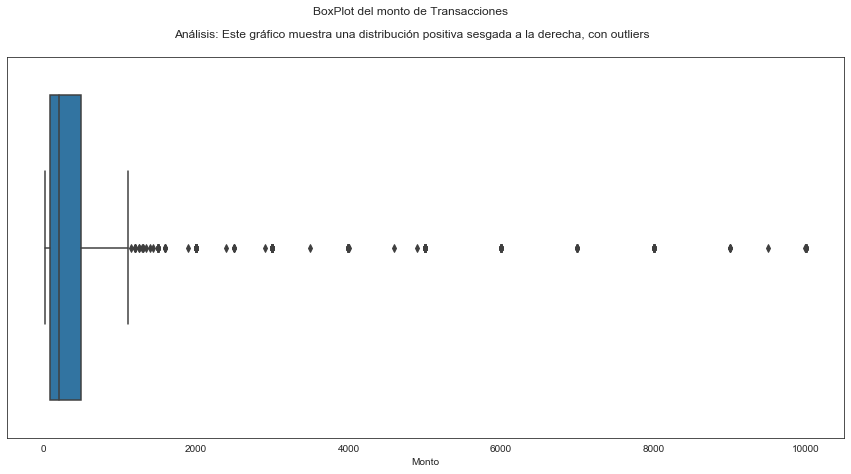

In [63]:
fig, ax = plt.subplots()
fig.suptitle('BoxPlot del monto de Transacciones \n\nAnálisis: Este gráfico muestra una distribución positiva sesgada a la derecha, con outliers')
fig.set_size_inches(15, 7)
sns.boxplot(df_cp['Monto'])

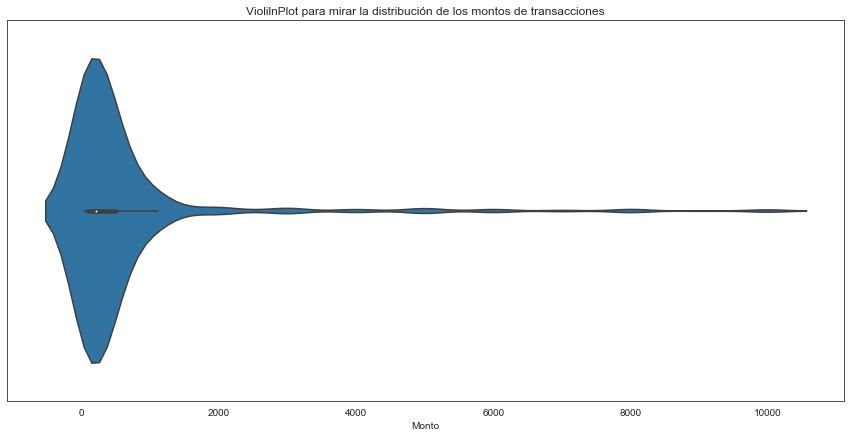

In [64]:
fig, ax = plt.subplots()
plt.title("ViolilnPlot para mirar la distribución de los montos de transacciones")
fig.set_size_inches(15, 7)
sns.violinplot(df_cp['Monto'])

### 2.2 Distribución de Montos de Transacciones menores a 2000 pesos

In [65]:
s1 = df_cp.loc[df_cp['Monto'] <=2000]

mean = s1['Monto'].mean()
median = s1['Monto'].median()
std = s1['Monto'].std()
skew = s1['Monto'].skew()
kurt = s1['Monto'].kurtosis()
print("Mean:", mean)
print("Median:", median)
print("Std Dev:", std)
print("Skew:", skew)
print("Kurtosis:", kurt)

per25 = np.percentile(s1['Monto'], 25)
print("Percentil 25:", per25)
per50 = np.percentile(s1['Monto'], 50)
print("Percentil 50:", per50)
per75 = np.percentile(s1['Monto'], 75)
print("Percentil 75:", per75)
iqr = per75-per25
print("IQR:", iqr)


Mean: 321.8906464285715
Median: 200.0
Std Dev: 362.19203058181785
Skew: 2.2448554967679035
Kurtosis: 6.174715466485354
Percentil 25: 79.75
Percentil 50: 200.0
Percentil 75: 500.0
IQR: 420.25


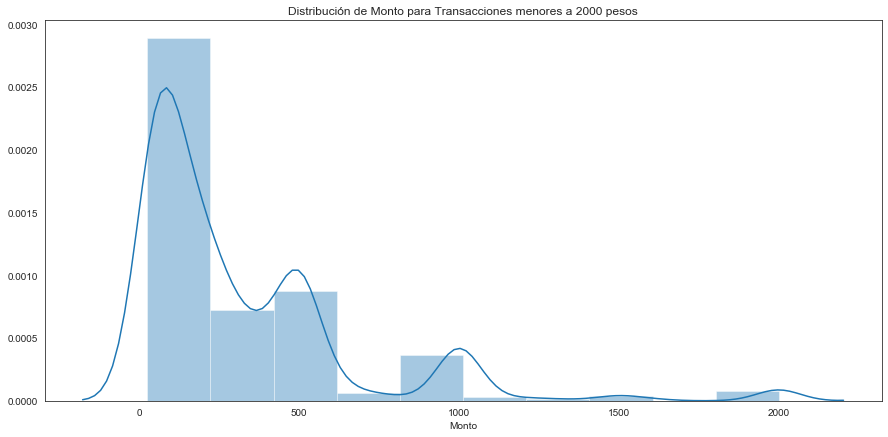

In [66]:
fig, ax = plt.subplots()
plt.title("Distribución de Monto para Transacciones menores a 2000 pesos")
fig.set_size_inches(15, 7)
sns.distplot(s1['Monto'], bins=10)

In [68]:
df_cp.groupby(['Monto']).count().reset_index()

Monto  ID_transaccin  Orden  Recurrente  Fecha_de_operacin  Score  \
0       25.0             49     49          49                 49     49   
1       26.0              1      1           1                  1      1   
2       27.0              2      2           2                  2      2   
3       28.0              1      1           1                  1      1   
4       29.0              1      1           1                  1      1   
..       ...            ...    ...         ...                ...    ...   
219   9000.0              4      4           4                  4      4   
220   9500.0              1      1           1                  1      1   
221   9990.0              1      1           1                  1      1   
222   9999.0              2      2           2                  2      2   
223  10000.0             13     13          13                 13     13   

     Estado  ID_cliente  Tipo_de_tarjeta  ID comercio  Respuesta_de_banco  \
0        49          49               49           49                  12   
1         1           1                1            1                   0   
2         2           2                2            2                   2   
3         1           1                1            1                   1   
4         1           1                1            1                   0   
..      ...         ...              ...          ...                 ...   
219       4           4                4            4                   0   
220       1           1                1            1                   0   
221       1           1                1            1                   0   
222       2           2                2            2                   0   
223      13          13               13           13                   0   

     Email_score  das_prim_correo  Dominio  Regla_nivel_normal  \
0             47               47       47                  40   
1              1                1        1                   1   
2              2                2        2                   2   
3              1                1        1                   1   
4              1                1        1                   1   
..           ...              ...      ...                 ...   
219            4                4        4                   4   
220            1                1        1                   1   
221            1                1        1                   1   
222            2                2        2                   2   
223           13               13       13                  13   

     Regla_nivel_medio  Regla_nivel_alto  Accin  
0                   40                30      2  
1                    1                 0      0  
2                    2                 2      0  
3                    1                 1      0  
4                    1                 0      0  
..                 ...               ...    ...  
219                  4                 4      0  
220                  1                 1      0  
221                  1                 1      0  
222                  2                 2      0  
223                 13                12      0  

[224 rows x 18 columns]

Mean: 69.17345907713035
Median: 54.0
Std Dev: 52.61978911391879
Skew: 2.2832328596287517
Kurtosis: 4.457988579067493
Percentil 25: 42.0
Percentil 50: 54.0
Percentil 75: 70.0
IQR: 28.0


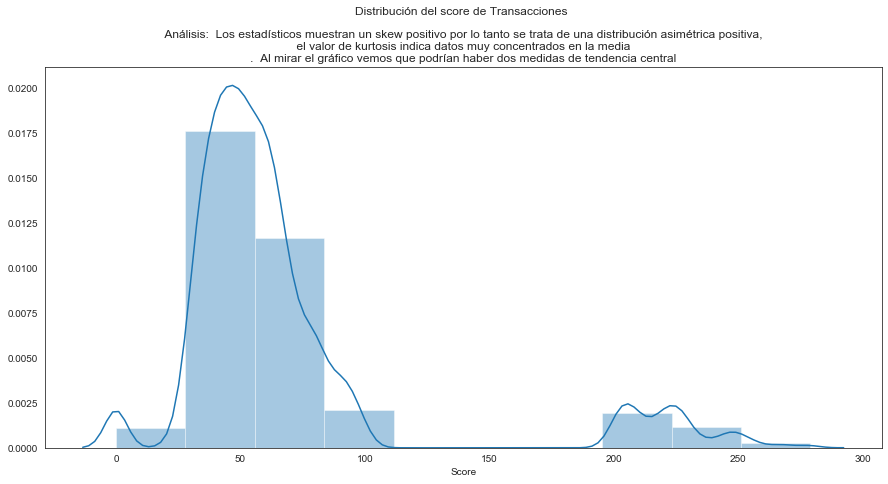

In [71]:
mean = df_cp['Score'].mean()
median =  df_cp['Score'].median()
std =  df_cp['Score'].std()
skew =  df_cp['Score'].skew()
kurt =  df_cp['Score'].kurtosis()
print("Mean:", mean)
print("Median:", median)
print("Std Dev:", std)
print("Skew:", skew)
print("Kurtosis:", kurt)

per25 = np.percentile(df_cp['Score'], 25)
print("Percentil 25:", per25)
per50 = np.percentile(df_cp['Score'], 50)
print("Percentil 50:", per50)
per75 = np.percentile(df_cp['Score'], 75)
print("Percentil 75:", per75)
iqr = per75-per25
print("IQR:", iqr)

fig, ax = plt.subplots()
plt.title("Distribución del score de Transacciones \n\n Análisis:  Los estadísticos muestran un skew positivo por lo tanto se trata de una distribución asimétrica positiva, \n el valor de kurtosis indica datos muy concentrados en la media \n.  Al mirar el gráfico vemos que podrían haber dos medidas de tendencia central")
fig.set_size_inches(15, 7)
sns.distplot( df_cp['Score'], bins=10)

Mean: 275.639875819248
Median: 174.0
Std Dev: 244.20988356175675
Skew: 1.0679733187101978
Kurtosis: 0.250688964126514
Percentil 25: 87.0
Percentil 50: 174.0
Percentil 75: 500.0
IQR: 413.0


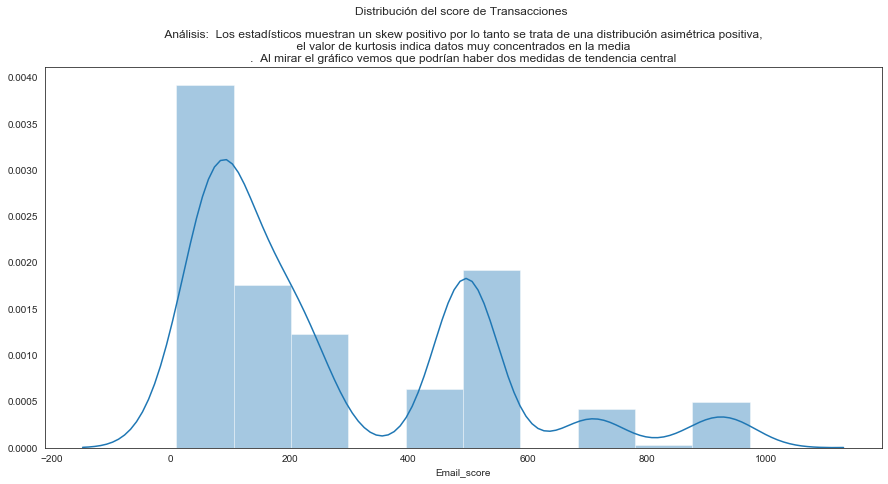

In [90]:
df_score = df_cp[df_cp['Email_score'] >=0]

mean = df_score['Email_score'].mean()
median =  df_score['Email_score'].median()
std =  df_score['Email_score'].std()
skew =  df_score['Email_score'].skew()
kurt =  df_score['Email_score'].kurtosis()
print("Mean:", mean)
print("Median:", median)
print("Std Dev:", std)
print("Skew:", skew)
print("Kurtosis:", kurt)

per25 = np.percentile(df_score['Email_score'], 25)
print("Percentil 25:", per25)
per50 = np.percentile(df_score['Email_score'], 50)
print("Percentil 50:", per50)
per75 = np.percentile(df_score['Email_score'], 75)
print("Percentil 75:", per75)
iqr = per75-per25
print("IQR:", iqr)

fig, ax = plt.subplots()
plt.title("Distribución del score de Transacciones \n\n Análisis:  Los estadísticos muestran un skew positivo por lo tanto se trata de una distribución asimétrica positiva, \n el valor de kurtosis indica datos muy concentrados en la media \n.  Al mirar el gráfico vemos que podrían haber dos medidas de tendencia central")
fig.set_size_inches(15, 7)
sns.distplot( df_score['Email_score'], bins=10)

## 3. ANÁLISIS BIVARIADO

Para este análisis utilizaremos un scaterplot que nos permita visualizar la relación entre las 3 variables estudiadas anteriormente: peso, altura y velocidad

## 3.1 Estado de la Transacción (Aceptada/Riesgo Fraude), Score, Email Score y Monto

In [80]:
rho, p = st.spearmanr(df_cp["Monto"],df_cp["Score"])
print('El coeficiente de correlación de spearman es de: {}'.format(rho))
print('El valor ⍴ es de: {}'.format(p))

El coeficiente de correlación de spearman es de: -0.12657235797149916
El valor ⍴ es de: 4.4628256731178145e-12


In [94]:
rho, p = st.spearmanr(df_score["Monto"],df_score["Email_score"])
print('El coeficiente de correlación de spearman es de: {}'.format(rho))
print('El valor ⍴ es de: {}'.format(p))

El coeficiente de correlación de spearman es de: -0.3420513907573943
El valor ⍴ es de: 2.292954969681259e-80


In [ ]:
rho, p = st.spearmanr(df_score["Monto"],df_score["Email_score"])
print('El coeficiente de correlación de spearman es de: {}'.format(rho))
print('El valor ⍴ es de: {}'.format(p))

El valor de p es muy cercano a 0 por lo que indica una relación débil entre el monto de la transacción y el valor del email scoring.

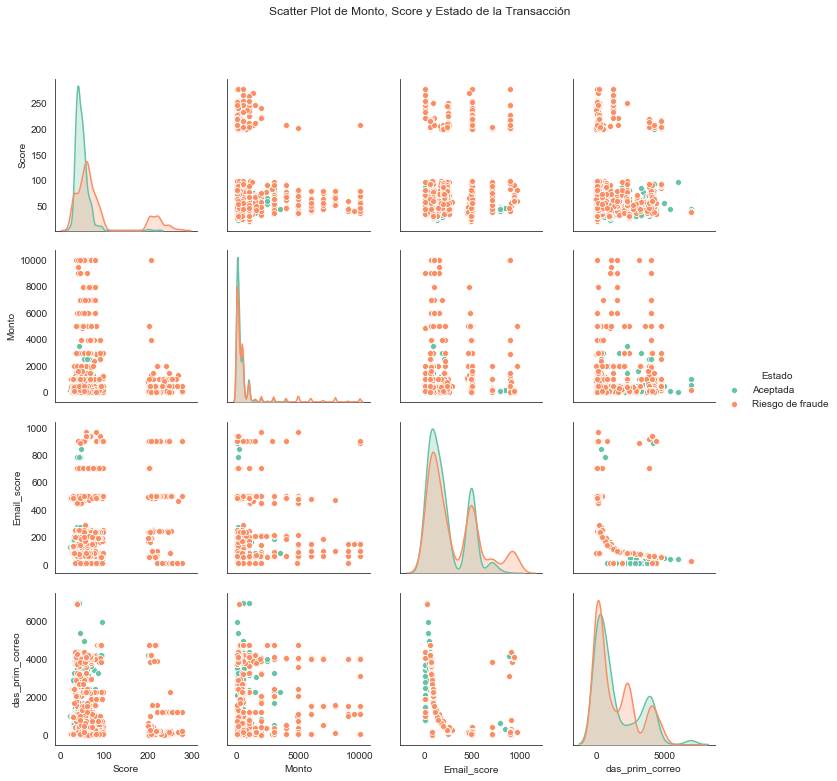

In [92]:
df_group = df_score.groupby(['ID_transaccin','Estado'])['Score', 'Monto','Email_score','das_prim_correo'].max().reset_index()
g = sns.pairplot(df_group, kind="scatter", hue="Estado", palette="Set2")
g.fig.suptitle("Scatter Plot de Monto, Score y Estado de la Transacción", y=1.08)
plt.show()

## 5. KEY INSIGHTS DEL EDA


* En base a las distribuciones analizadas podemos decir que las variables de monto, score, email_score no influyen directamente en la respuesta respecto a la validez de la transacción (Aceptada/Riesgo de Fraude)
* Con el fin de tener un dataset aleatorio y que represente a la población en general -por ende- permita realizar un modelo estadístico sustentable.

## 6. Modelo Árbol de Decision 

In [101]:
pd_tipo_tarjeta=pd.crosstab(df_score["Tipo_de_tarjeta"], df_score["Estado"], dropna=False)
pd_tipo_tarjeta

Estado           Aceptada  Riesgo de fraude
Tipo_de_tarjeta                            
CREDIT                121               227
DEBIT                1151              1400

In [102]:
stat, p, dof, expected = st.chi2_contingency(pd_tipo_tarjeta,correction=False)
print('stat: {}'.format(stat))
print('p: {}'.format(p))
print('dof: {}'.format(dof))
print('exp: {}'.format(expected))

stat: 13.319792539224272
p: 0.00026261923214961373
dof: 1
exp: [[ 152.69265264  195.30734736]
 [1119.30734736 1431.69265264]]


In [104]:
df_group.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2899 entries, 0 to 2898
Data columns (total 6 columns):
ID_transaccin      2899 non-null object
Estado             2899 non-null object
Score              2899 non-null int64
Monto              2899 non-null float64
Email_score        2899 non-null float64
das_prim_correo    2899 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 136.0+ KB


In [ ]:
df_group.drop(['ID_transaccin'], axis=1, inplace=True)

In [108]:
df_group_cat = df_group["Estado"]
df_group.drop(['Estado'], axis=1, inplace=True)

In [128]:
df_group.drop(['das_prim_correo'], axis=1, inplace=True)

In [130]:
clf = tree.DecisionTreeClassifier()
# Training the Decision Tree
clf_train = clf.fit(df_group, df_group_cat, cv = 10)
# Export/Print a decision tree in DOT format.
## print(tree.export_graphviz(clf_train, None))

#Create Dot Data
dot_data = tree.export_graphviz(clf_train, out_file=None, feature_names=list(df_group.columns.values), class_names=['A', 'B'], rounded=True, filled=True) 
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())